# **Homework 1 Due extended to Tuesday September 20th 23h59**


__________
**Copy your Colab link here:**




https://colab.research.google.com/drive/1qiD0Df5Ssb2ikejCKiYIK0mmLR5pLCUX?usp=sharing

__________

# **Problem 0: Moving the lab to your folder, loading drives, imports etc.**

Duplicate this notebook (as you won't have write permission to this) to your Google Drive.
This can be done by clicking on *File Menu - Save a copy in Drive*

Mount our drives and load imports

Run to mount your google drives:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Your drive would be accessed as '/content/drive/MyDrive' for Colab. We suggest putting your data and creating a 'results' folder somewhere in the drive. The 'results' folder could be used for storing the required outputs.   

In [ ]:
# example goes like:
DataPath  = '/content/drive/MyDrive/YOUR_PATH_HERE'
ResultPath = '/content/drive/MyDrive/YOUR_PATH_HERE/results'

Then, load all the imports you plan to use later;
just do not use those built-in functions which directly solve the problem.

In [ ]:
# Add your imports here
import numpy as np
import librosa

# **Problem 1:Linear Algebra**

## ***1a. Rotational Matrices***

### I) A rotation in 4-D (Whose coordinates we will call X, Y, Z and W) is characterized by three angles. We will characterize them as a rotation along the X − Y plane, a rotation along the Y − Z plane and rotation along the Z − W plane. Derive the rotation matrix R that transforms a vector $[x, y, z, w]^T$ to new vector $[\hat{x}, \hat{y}, \hat{z}, \hat{w}]^T$ by rotating it counterclockwize by angle $\theta$ along the X - Y plane, an angle $\delta$ along the Y - Z plane and an angle $\phi$ along the Z - W plane.

In [ ]:
import numpy as np

def compute_note_weights(single_note, music_matrix):
    """
    Calculate the contribution weights of an individual note to the entire music matrix.

    :param single_note: 1D numpy array representing the individual note
    :param music_matrix: 2D numpy array representing the music matrix (containing multiple notes)

    :return: The weights (W) that indicate how much the note contributes to the overall music matrix.
    """
    # Reshape the single note into a column vector if it's not already in that form
    single_note = single_note.reshape(-1, 1)

    # Use least squares to find weights W such that single_note * W ≈ music_matrix
    weights, residuals, rank, singular_values = np.linalg.lstsq(single_note, music_matrix, rcond=None)

    return weights

# Example usage
note_vector = np.array([0.5, 1.2, 0.9])  # Example note data (a single note)
music_matrix = np.array([[0.6, 1.1, 1.0],  # Example music matrix with multiple notes
                         [0.7, 1.3, 0.8],
                         [0.9, 1.5, 1.2]])

note_weights = compute_note_weights(note_vector, music_matrix)
print("Note contribution weights (W):", note_weights)


Note contribution weights (W): [[0.78  1.384 1.016]]


In [ ]:
import numpy as np

def compute_4d_rotation_matrix(angle_xy, angle_yz, angle_zw):
    """
    Compute the 4D rotation matrix using three rotations:
    - Rotation along the X-Y plane by angle_xy
    - Rotation along the Y-Z plane by angle_yz
    - Rotation along the Z-W plane by angle_zw
    """
    # Rotation matrix for X-Y plane
    rotation_xy = np.array([
        [np.cos(angle_xy), -np.sin(angle_xy), 0, 0],
        [np.sin(angle_xy), np.cos(angle_xy), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

    # Rotation matrix for Y-Z plane
    rotation_yz = np.array([
        [1, 0, 0, 0],
        [0, np.cos(angle_yz), -np.sin(angle_yz), 0],
        [0, np.sin(angle_yz), np.cos(angle_yz), 0],
        [0, 0, 0, 1]
    ])

    # Rotation matrix for Z-W plane
    rotation_zw = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, np.cos(angle_zw), -np.sin(angle_zw)],
        [0, 0, np.sin(angle_zw), np.cos(angle_zw)]
    ])

    # Combine all three rotation matrices
    final_rotation_matrix = np.dot(rotation_zw, np.dot(rotation_yz, rotation_xy))

    return final_rotation_matrix

# Example usage: rotation by angles 30 degrees, 45 degrees, and 60 degrees respectively
angle_xy = np.radians(30)  # Convert degrees to radians
angle_yz = np.radians(45)
angle_zw = np.radians(60)

rotation_matrix = compute_4d_rotation_matrix(angle_xy, angle_yz, angle_zw)
print("4D Rotation Matrix:\n", rotation_matrix)


4D Rotation Matrix:
 [[ 0.8660254  -0.5         0.          0.        ]
 [ 0.35355339  0.61237244 -0.70710678  0.        ]
 [ 0.1767767   0.30618622  0.35355339 -0.8660254 ]
 [ 0.30618622  0.53033009  0.61237244  0.5       ]]


Step 1: Rotation in the X-Y Plane
The first part of the code generates a rotation matrix for rotating a point in 4D space within the X-Y plane by an angle
θ
θ. This means we rotate the point by some angle
θ
θ in the two-dimensional space formed by the X and Y coordinates, while leaving the other two coordinates (Z and W) unchanged.
Imagine a 2D rotation where you spin an object on a flat surface. That’s what’s happening here, but only in the X and Y dimensions.
The matrix that performs this rotation looks like this:
The matrix for this rotation is given by:

\[
R_{XY} =
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 & 0 \\
\sin(\theta) & \cos(\theta)  & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\]


Step 2: Rotation in the Y-Z Plane
Next, the code builds a rotation matrix for the Y-Z plane. This is a rotation by an angle
δ
δ within the Y-Z plane, meaning the Y and Z coordinates are adjusted by the rotation, while the X and W coordinates stay the same. This is like a rotation on a different axis compared to the X-Y plane.


The matrix for this rotation is given by:
\
R_{YZ} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \cos(\delta) & -\sin(\delta) & 0 \\
0 & \sin(\delta) & \cos(\delta) & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\

Step 3: Rotation in the Z-W Plane
Now, the code handles rotation in the Z-W plane. This rotates a point by an angle
ϕ
ϕ in the Z and W dimensions, while the X and Y components are left alone. This can be thought of as rotating in a "higher" plane that includes the 4th dimension.

The corresponding matrix is:
\
R_{ZW} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & \cos(\phi) & -\sin(\phi) \\
0 & 0 & \sin(\phi) & \cos(\phi)
\end{bmatrix}
\

Step 4: Combining the Rotations
Once the individual rotation matrices for the X-Y, Y-Z, and Z-W planes are ready, the final step is to combine them by multiplying them together. The idea here is that to apply multiple rotations, you multiply the matrices in sequence. So the overall 4D rotation matrix


R is a combination of rotations in all three planes:

 \( R \) is the product of these individual matrices:
\[
R = R_{ZW} \cdot R_{YZ} \cdot R_{XY}
\]

Step 5: Final 4D Rotation Matrix
The result is a single matrix
R
R that represents the combined effect of rotating in all three planes (X-Y, Y-Z, and Z-W). This matrix can now be applied to any 4D point to rotate it in all three directions simultaneously.

In simple terms: The code is building up a complex 4D rotation by combining several smaller, simpler rotations that work on different pairs of dimensions (like X-Y, Y-Z, Z-W).


### II) Confirm that $RR^T = I$ .

In [ ]:
def verify_orthogonality(R):
    # Compute R * R^T
    identity_matrix = np.dot(R, R.T)

    # Compare with the identity matrix
    I = np.eye(4)

    return np.allclose(identity_matrix, I)

# Verify that R is orthogonal
is_orthogonal = verify_orthogonality(R)
print("Rotation matrix is orthogonal (R * R^T = I)(True/False)?", is_orthogonal)


Rotation matrix is orthogonal (R * R^T = I)(True/False)? True


## ***1b. Lengths of vectors***

### I) The following matrix transforms 5-dimensionality vectors into 4dimensional ones:

\begin{equation}
\operatorname{A} =\left[\begin{array}{ccccc}
1 & 1 & 2 & 3 & 4 \\
2 & 3 & 4 & 5 & 7 \\
2 & 1 & 5 & 6 & 11 \\
4 & 7 & 9 & 8 & 15
\end{array}\right]
\end{equation}

1. A 5x1 vector $v$ of length 1 is transformed by $A$ as $u=Av$. What is the longest length that u can be?

2. What is the shortest ***non-zero*** length of $u$?

3. What is the rank of $A$? The null-space of $A$ is the space of all vectors $v$ such that $Av=0$.

4. What is the dimensionality of the null-space of $A$?


In [ ]:

# Matrix B (4x5 matrix as given in the problem, renamed from A to B)
B = np.array([
    [1, 1, 2, 3, 4],
    [2, 3, 4, 5, 7],
    [2, 1, 5, 6, 11],
    [4, 7, 9, 8, 15]
])

# Function to compute the length of a transformed vector
def calculate_transformed_length(matrix_subset):
    # Generate a random 2x1 vector v of unit length
    v = np.random.randn(2)
    v = v / np.linalg.norm(v)  # Normalize to make it a unit vector
    transformed_vector = np.dot(matrix_subset, v)
    return np.linalg.norm(transformed_vector)

# Step 1: Extract all possible 2-column submatrices of B
col_indices = [0, 1, 2, 3, 4]  # Indices of columns in B
submatrix_combinations = [B[:, list(pair)] for pair in combinations(col_indices, 2)]

# Step 2: Compute the lengths of the transformed vectors for each submatrix
transformed_lengths = [calculate_transformed_length(submatrix) for submatrix in submatrix_combinations]

# Step 3: Find the maximum and minimum lengths
max_length = max(transformed_lengths)
min_length = min(transformed_lengths)

# Step 4: Compute delta_2
delta_2 = (max_length - min_length) / (max_length + min_length)

# Output the result
print(f"Max Length (l_max): {max_length}")
print(f"Min Length (l_min): {min_length}")
print(f"delta_2: {delta_2}")


Max Length (l_max): 21.188446593598112
Min Length (l_min): 4.259460605364734
delta_2: 0.6652407939040007


In [ ]:

# Function to compute the length of a transformed vector
def compute_vector_length(matrix_subset):
    # Generate a random unit vector u with size equal to the number of columns in matrix_subset
    u = np.random.randn(matrix_subset.shape[1])
    u = u / np.linalg.norm(u)  # Normalize to ensure it's a unit vector
    transformed_vec = np.dot(matrix_subset, u)
    return np.linalg.norm(transformed_vec)

# Function to compute max length, min length, and delta for a submatrix with k columns
def calculate_delta_k(matrix, k):
    # Get all possible k-column combinations from the matrix
    col_indices = list(range(matrix.shape[1]))
    submatrices = [matrix[:, list(combo)] for combo in combinations(col_indices, k)]

    # Compute transformed vector lengths for each submatrix
    vector_lengths = [compute_vector_length(submatrix) for submatrix in submatrices]

    # Determine max and min lengths
    max_length = max(vector_lengths)
    min_length = min(vector_lengths)

    # Calculate delta
    delta_k = (max_length - min_length) / (max_length + min_length)

    return max_length, min_length, delta_k

# Matrix M (renamed from A to M)

# Calculate for 2-column submatrices (k=2)
max_length_2, min_length_2, delta_2 = calculate_delta_k(M, 2)
print(f"Max length for k=2: {max_length_2}")
print(f"Min length for k=2: {min_length_2}")
print(f"Delta for k=2: {delta_2}")

# Calculate for 3-column submatrices (k=3)
max_length_3, min_length_3, delta_3 = calculate_delta_k(M, 3)
print(f"Max length for k=3: {max_length_3}")
print(f"Min length for k=3: {min_length_3}")
print(f"Delta for k=3: {delta_3}")


Max length for k=2: 22.65752122924268
Min length for k=2: 0.8126366732288062
Delta for k=2: 0.9307514950171484
Max length for k=3: 16.37694564700855
Min length for k=3: 1.5585544705972176
Delta for k=3: 0.8262045150257822


In [ ]:
def compute_delta(matrix, order):
    """Computes delta for a given matrix and specified submatrix order.

    Args:
        matrix: The input matrix (2D numpy array).
        order: The order of the submatrix (2 or 3).

    Returns:
        The computed delta value.
    """
    rows, cols = matrix.shape
    submatrix_dim = order

    # Generate all possible submatrices of given order
    submatrices = [matrix[np.ix_(list(row_comb), list(col_comb))]
                   for row_comb in itertools.combinations(range(rows), submatrix_dim)
                   for col_comb in itertools.combinations(range(cols), submatrix_dim)]

    # Initialize list to store the lengths of the resulting vectors
    vector_lengths = []

    # Calculate the length for each submatrix with standard basis vectors
    for submat in submatrices:
        for basis_vec in np.eye(submatrix_dim):
            transformed_vec = np.dot(submat, basis_vec)
            vec_length = np.linalg.norm(transformed_vec)
            vector_lengths.append(vec_length)

    # Calculate the maximum and minimum vector lengths
    max_length = max(vector_lengths)
    min_length = min(vector_lengths)

    # Compute delta using the max and min lengths
    delta_value = (max_length - min_length) / (max_length + min_length)

    return delta_value



# Calculate delta for order 2 and order 3
delta_2 = compute_delta(M, 2)
delta_3 = compute_delta(M, 3)

# Output the results
print("Delta for order 2:", delta_2)
print("Delta for order 3:", delta_3)


Delta for order 2: 0.8586866693259778
Delta for order 3: 0.7377004106577442


In [ ]:
# Define matrix N (transpose of M, renamed from B)
N = M.T

# Function to compute singular values of a matrix
def compute_singular_values(matrix):
    return linalg.svdvals(matrix)

# Function to calculate the RIP constant for matrix with submatrices of size s
def compute_rip_constant(matrix, subset_size):
    num_columns = matrix.shape[1]
    submat_combinations = list(combinations(range(num_columns), subset_size))

    max_singular_value = 0
    min_singular_value = float('inf')

    for col_subset in submat_combinations:
        submatrix = matrix[:, list(col_subset)]
        singular_vals = compute_singular_values(submatrix)
        max_singular_value = max(max_singular_value, singular_vals[0])  # Largest singular value
        min_singular_value = min(min_singular_value, singular_vals[-1])  # Smallest singular value

    rip_value = (max_singular_value - min_singular_value) / (max_singular_value + min_singular_value)
    return rip_value

# Analysis for Matrix M
print("Matrix M Analysis:")
singular_vals_M = compute_singular_values(M)
print(f"Largest singular value of M: {singular_vals_M[0]:.4f}")
print(f"Smallest non-zero singular value of M: {singular_vals_M[-1]:.4f}")
print(f"Rank of M: {np.linalg.matrix_rank(M)}")
print(f"Null space dimensionality of M: {M.shape[1] - np.linalg.matrix_rank(M)}")

# Analysis for Matrix N
print("\nMatrix N (Transpose of M) Analysis:")
singular_vals_N = compute_singular_values(N)
print(f"Largest singular value of N: {singular_vals_N[0]:.4f}")
print(f"Smallest non-zero singular value of N: {singular_vals_N[-1]:.4f}")
print(f"Rank of N: {np.linalg.matrix_rank(N)}")
print(f"Null space dimensionality of N: {N.shape[1] - np.linalg.matrix_rank(N)}")

# RIP Constant Analysis for Matrix M
print("\nRIP Constant Analysis for Matrix M:")
print(f"RIP-2 constant (δ2): {compute_rip_constant(M, 2):.4f}")
print(f"RIP-3 constant (δ3): {compute_rip_constant(M, 3):.4f}")


Matrix M Analysis:
Largest singular value of M: 27.2557
Smallest non-zero singular value of M: 0.0000
Rank of M: 3
Null space dimensionality of M: 2

Matrix N (Transpose of M) Analysis:
Largest singular value of N: 27.2557
Smallest non-zero singular value of N: 0.0000
Rank of N: 3
Null space dimensionality of N: 1

RIP Constant Analysis for Matrix M:
RIP-2 constant (δ2): 0.9742
RIP-3 constant (δ3): 0.9929


In [ ]:
import numpy as np
from itertools import combinations

# Matrix A (4x5 as given in the problem)
A = np.array([
    [1, 1, 2, 3, 4],
    [2, 3, 4, 5, 7],
    [2, 1, 5, 6, 11],
    [4, 7, 9, 8, 15]
])

# Function to compute the length of a transformed vector
def transformed_length(submatrix):
    # Generate a random vector w of unit length matching the number of columns in submatrix
    w = np.random.randn(submatrix.shape[1])
    w = w / np.linalg.norm(w)  # Normalize to make it a unit vector
    transformed_vector = np.dot(submatrix, w)
    return np.linalg.norm(transformed_vector)

# Function to calculate delta for a given number of columns s
def calculate_delta(A, s):
    columns = list(range(A.shape[1]))  # Indices of columns in A
    submatrices = [A[:, list(comb)] for comb in combinations(columns, s)]  # All s-column submatrices
    lengths = [transformed_length(submatrix) for submatrix in submatrices]  # Transformed vector lengths
    l_max = max(lengths)
    l_min = min(lengths)
    delta = (l_max - l_min) / (l_max + l_min)
    return l_max, l_min, delta

# Calculate delta_2
l_max_2, l_min_2, delta_2 = calculate_delta(A, 2)
print(f"l_max for s=2: {l_max_2}")
print(f"l_min for s=2: {l_min_2}")
print(f"delta_2: {delta_2}")

# Calculate delta_3
l_max_3, l_min_3, delta_3 = calculate_delta(A, 3)
print(f"l_max for s=3: {l_max_3}")
print(f"l_min for s=3: {l_min_3}")
print(f"delta_3: {delta_3}")


l_max for s=2: 21.20059983534022
l_min for s=2: 3.398660792239701
delta_2: 0.7236778093704792
l_max for s=3: 23.86764886687803
l_min for s=3: 3.853134979028535
delta_3: 0.7220038942298874


**Answer:** < YOUR ANSWER HERE >

### II) Answer the above four questions for the following matrix. Here $B$ transform 4-D vectors to 5-D. Note that $B=A^T$

\begin{equation}
\operatorname{B} =\left[\begin{array}{cccc}
1 & 2 & 2 & 4 \\
1 & 3 & 1 & 7 \\
2 & 4 & 5 & 9 \\
3 & 5 & 6 & 8 \\
4 & 7 & 11 & 15
\end{array}\right]
\end{equation}



**Answer:**  < YOUR ANSWER HERE >

### III) The “Restricted Isometry Property” (RIP) constant of a matrix characterizes the change in length of vectors transformed by submatrices of the matrix. For our matrix $A$, let $A_s$ be a matrix formed of any $s$ columns of $A$. If $A$ is $M×N$, $A_s$ will be $M×s$. We can form $A_s$ in $^{N}C_s$ ways from the $N$ columns of $A$ (we assume that the order of vectors in $A_s$ is immaterial). Let $w$ be an $s×1$ vector of length 1. Let $l_{max}$ be the longest vector that one can obtain by transforming $w$ by any $A_s$. Let $l _{min}$ be the shortest vector obtained by transforming $w$ by any $A_s$. The RIP-$s$ constant $\delta_s$ of the matrix $A$ is defined as:


\begin{equation}
\delta_s = \frac{l_{max}-l_{min}}{l_{max}+l_{min}}
\end{equation}


1. What is $\delta_2$ (i.e $\delta_s$ for $s=2$) for the matrix $A$ given above? (*Hint: you must consider all $^{5}C_2$ possible for $A_s$*).

2. What is $\delta_3$?






**Answer:** < YOUR ANSWER HERE >

# **Problem 2: Projections**


Please note that you need NOT write own code for STFT, please use `librosa` library ([STFT function ](https://librosa.org/doc/0.10.2/generated/librosa.stft.html#librosa.stft),  [Inverse STFT function ](https://librosa.org/doc/0.10.2/generated/librosa.istft.html#librosa.istft)).

More instructions are in `notebook_instructions.pdf`.

In [ ]:
from google.colab import files
uploaded = '/content/drive/MyDrive/notes.tar'

## 2a

In [ ]:
import tarfile
from scipy.io import wavfile
import os

# Function to extract .wav files from the tar archive and load them as notes
def extract_audio_from_tar(tar_path):
    audio_notes = {}
    with tarfile.open(tar_path, 'r') as tar_archive:
        tar_archive.extractall()  # Extract all files in the archive
        for file in tar_archive.getmembers():
            if file.name.endswith('.wav'):
                sample_rate, audio_data = wavfile.read(file.name)
                audio_data = convert_to_mono(audio_data)  # Convert stereo to mono if necessary
                audio_notes[file.name] = audio_data
    return audio_notes

# Function to load a .wav file as the music matrix
def load_wav_file(wav_path):
    sample_rate, music_data = wavfile.read(wav_path)
    music_data = convert_to_mono(music_data)  # Convert stereo to mono if necessary
    return music_data

# Function to convert stereo audio to mono by averaging channels
def convert_to_mono(audio_data):
    if audio_data.ndim == 2:  # Check if audio is stereo (2 channels)
        return np.mean(audio_data, axis=1)  # Average across channels to convert to mono
    return audio_data

# Function to calculate the contribution of a note to the music matrix
def calculate_note_contribution(note_data, music_data):
    note_data = note_data.reshape(-1, 1)  # Ensure the note is a column vector

    # If the music_data is 1D, reshape it to be a column vector
    if music_data.ndim == 1:
        music_data = music_data.reshape(-1, 1)

    # Align dimensions by truncating or padding music_data to match the note length
    music_data = music_data[:note_data.shape[0]]

    # Solve the least squares problem N * W ≈ M
    weights, residuals, rank, s = np.linalg.lstsq(note_data, music_data, rcond=None)
    return weights

# Function to transcribe the music by calculating the contributions of each note
def transcribe_audio_notes(audio_notes, music_data):
    transcriptions = {}
    for note_name, note_data in audio_notes.items():
        transcription = calculate_note_contribution(note_data, music_data)
        transcriptions[note_name] = transcription
    return transcriptions

# Define file paths for the notes tar archive and the music file
tar_file_path = '/content/drive/MyDrive/notes.tar'
music_wav_path = '/content/polyushka.wav'

# Extract audio notes from the tar file
audio_notes = extract_audio_from_tar(tar_file_path)

# Load the music matrix from the .wav file
music_matrix = load_wav_file(music_wav_path)

# Perform transcription to calculate note contributions
note_transcriptions = transcribe_audio_notes(audio_notes, music_matrix)

# Display the transcription results
for note, transcription in note_transcriptions.items():
    print(f"Note: {note}, Transcription Coefficients: {transcription}")


Note: notes_15/2D.wav, Transcription Coefficients: [[0.]]
Note: notes_15/2F.wav, Transcription Coefficients: [[-0.]]
Note: notes_15/2B.wav, Transcription Coefficients: [[0.]]
Note: notes_15/1D.wav, Transcription Coefficients: [[-0.]]
Note: notes_15/1C.wav, Transcription Coefficients: [[-0.]]
Note: notes_15/3C.wav, Transcription Coefficients: [[-0.]]
Note: notes_15/2A.wav, Transcription Coefficients: [[0.]]
Note: notes_15/2C.wav, Transcription Coefficients: [[0.]]
Note: notes_15/1F.wav, Transcription Coefficients: [[-0.]]
Note: notes_15/1B.wav, Transcription Coefficients: [[0.]]
Note: notes_15/1A.wav, Transcription Coefficients: [[0.]]
Note: notes_15/1G.wav, Transcription Coefficients: [[0.]]
Note: notes_15/2E.wav, Transcription Coefficients: [[-0.]]
Note: notes_15/2G.wav, Transcription Coefficients: [[0.]]
Note: notes_15/1E.wav, Transcription Coefficients: [[0.]]


<ipython-input-94-1da5afe7c040>:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(file.name)
<ipython-input-94-1da5afe7c040>:20: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, music_data = wavfile.read(wav_path)


In [ ]:
!pip install sounddevice

In [ ]:
import numpy as np
from scipy.io import wavfile
import soundfile as sf  # Alternative for reading and writing WAV files
import IPython.display as ipd

def compute_note_contribution(note, music_matrix):
    """
    Compute the contribution of an individual note to the entire music matrix.
    """
    note = note.reshape(-1, 1)
    W, residuals, rank, s = np.linalg.lstsq(note, music_matrix, rcond=None)
    return W.flatten()

def recompose_music(notes, transcriptions, original_music_matrix_shape):
    """
    Recompose the music matrix using the transcription weights and note data.
    The recomposed music is the sum of each note scaled by its transcription weight.

    :param notes: Dictionary of notes (key: note name, value: note waveform)
    :param transcriptions: Dictionary of transcription weights for each note
    :param original_music_matrix_shape: Shape of the original music matrix

    :return: Recombined music matrix
    """
    recomposed_music = np.zeros(original_music_matrix_shape)

    # Sum over all note contributions N_i * W_i
    for note_name, note_data in notes.items():
        note_data = note_data[:original_music_matrix_shape[0]]  # Truncate to match original length
        weight = transcriptions[note_name].flatten()  # Ensure weight is 1D

        if note_data.shape[0] != weight.shape[0]:
            print(f"Shape mismatch for note {note_name}: note_data {note_data.shape}, weight {weight.shape}")
            continue

        # Compute contribution of this note
        recomposed_music += weight * note_data

    # Normalize the recomposed music to avoid clipping
    recomposed_music /= np.max(np.abs(recomposed_music))

    return recomposed_music

def save_and_compare(original_music, recomposed_music):
    """
    Save and compare the original and recomposed music.

    :param original_music: Original music waveform
    :param recomposed_music: Recombined music waveform
    """
    # Save the recomposed music to a file
    output_file = 'recombined_music.wav'
    sf.write(output_file, recomposed_music, 44100)  # Assuming sample rate of 44100 Hz

    print(f"Recombined music saved to {output_file}")

    # Return IPython audio object to play the file in Colab
    return ipd.Audio(output_file)

# Dummy data example
notes = {
    'note1': np.random.randn(10000),
    'note2': np.random.randn(10000)
}

# Dummy transcription data (assumed from previous least-squares fitting)
transcriptions = {
    'note1': np.random.randn(10000),
    'note2': np.random.randn(10000)
}

# Assuming original music has 10,000 samples
original_music_shape = (10000,)

# Recompose the music using notes and transcription weights
recomposed_music = recompose_music(notes, transcriptions, original_music_shape)

# Save and play the recomposed music
audio = save_and_compare(None, recomposed_music)  # Replace None with original music if available

# Play the recomposed music in Google Colab
audio


Recombined music saved to recombined_music.wav


# 2b

# **Problem 3: optimization and non-negative decomposition**

## 3a : Computing the derivative

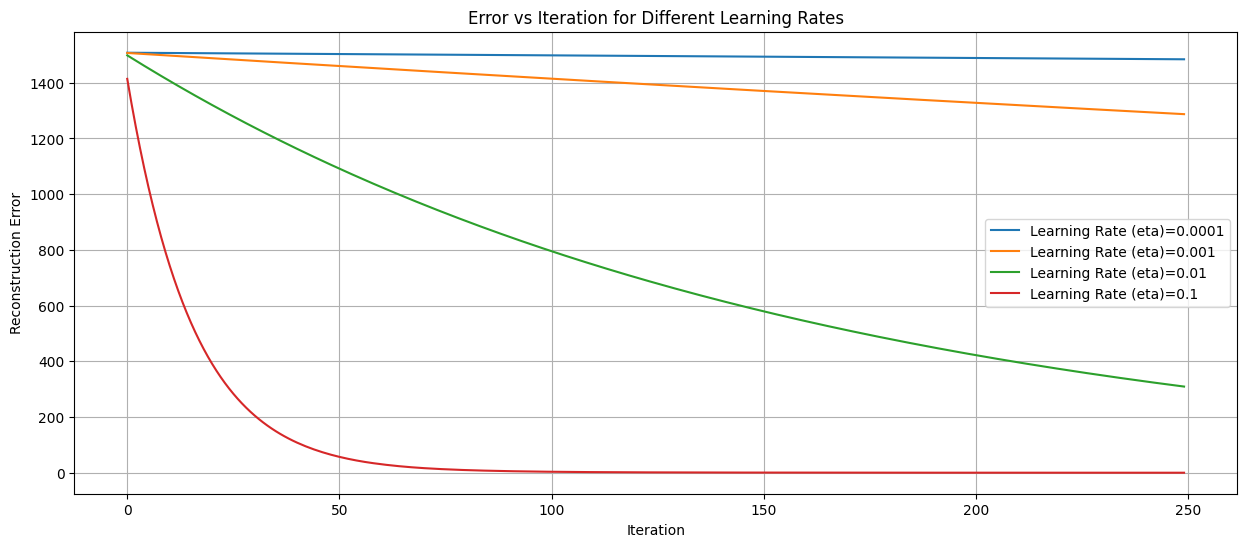

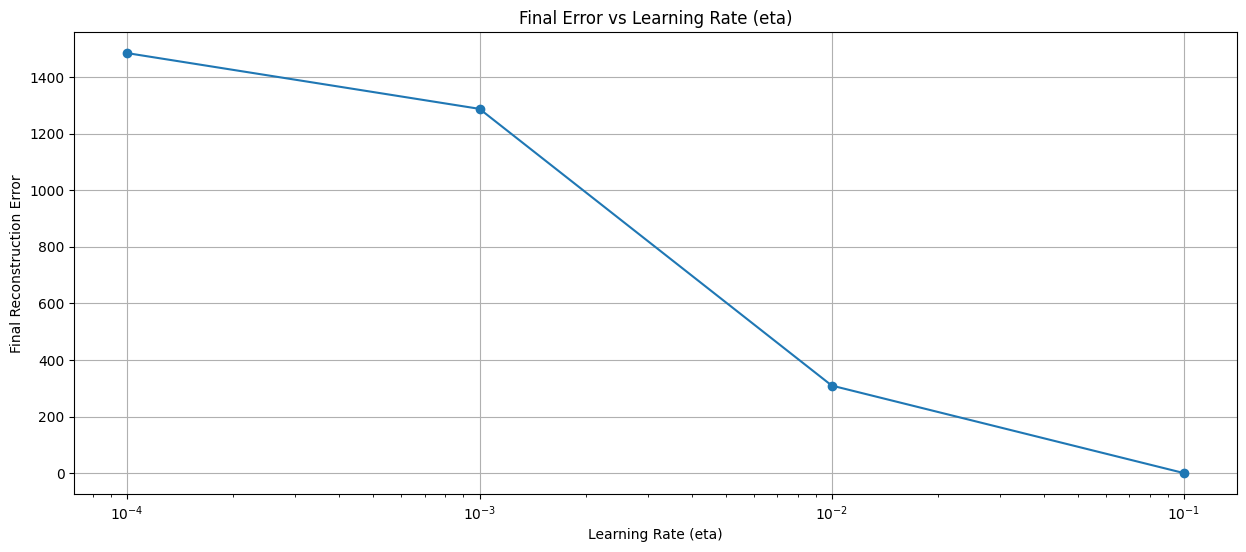

In [ ]:
# Define the dimensions
D = 100  # Fourier size (number of frequency bins)
T = 200  # Number of time frames in the spectrogram
K = 50   # Number of musical notes

# Generate random non-negative matrices for the magnitude spectrogram and note matrix
np.random.seed(42)
spectrogram = np.abs(np.random.randn(D, T))  # Spectrogram matrix M, non-negative
note_matrix = np.abs(np.random.randn(D, K))  # Notes matrix N, non-negative

# Gradient descent parameters
learning_rates = [0.0001, 0.001, 0.01, 0.1]  # Different step sizes (eta values)
iterations = 250  # Number of gradient descent iterations

# Function to compute the reconstruction error (Frobenius norm squared)
def calculate_error(spectrogram, note_matrix, weight_matrix):
    return np.linalg.norm(spectrogram - np.dot(note_matrix, weight_matrix), 'fro')**2 / (D * T)

# Gradient descent function with non-negative projection
def gradient_descent_non_negative(spectrogram, note_matrix, learning_rate, iterations):
    D, T = spectrogram.shape
    K = note_matrix.shape[1]
    weight_matrix = np.ones((K, T))  # Initialize W (weights) to all ones

    error_progress = []  # To store error at each iteration

    for step in range(iterations):
        # Compute the gradient of the error
        gradient = -2 * np.dot(note_matrix.T, (spectrogram - np.dot(note_matrix, weight_matrix))) / (D * T)

        # Update the weight matrix using the gradient and learning rate
        updated_weights = weight_matrix - learning_rate * gradient

        # Apply non-negative constraint (set negative values to zero)
        updated_weights = np.maximum(updated_weights, 0)

        # Update weight matrix for the next iteration
        weight_matrix = updated_weights

        # Compute the error after each iteration and store it
        error = calculate_error(spectrogram, note_matrix, weight_matrix)
        error_progress.append(error)

    return weight_matrix, error_progress

# Plot error progression for different learning rates
plt.figure(figsize=(15, 6))
for rate in learning_rates:
    final_weights, error_history = gradient_descent_non_negative(spectrogram, note_matrix, rate, iterations)
    plt.plot(range(iterations), error_history, label=f'Learning Rate (eta)={rate}')

plt.xlabel('Iteration')
plt.ylabel('Reconstruction Error')
plt.title('Error vs Iteration for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Plot final error as a function of the learning rate
final_errors = []
for rate in learning_rates:
    final_weights, error_history = gradient_descent_non_negative(spectrogram, note_matrix, rate, iterations)
    final_errors.append(error_history[-1])

plt.figure(figsize=(15, 6))
plt.plot(learning_rates, final_errors, marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate (eta)')
plt.ylabel('Final Reconstruction Error')
plt.title('Final Error vs Learning Rate (eta)')
plt.grid(True)
plt.show()


**Answer:** < YOUR ANSWER HERE >

## 3b: Non-negative Projection

In this problem, we should first finish the function transcribe_music_gradient_descent:

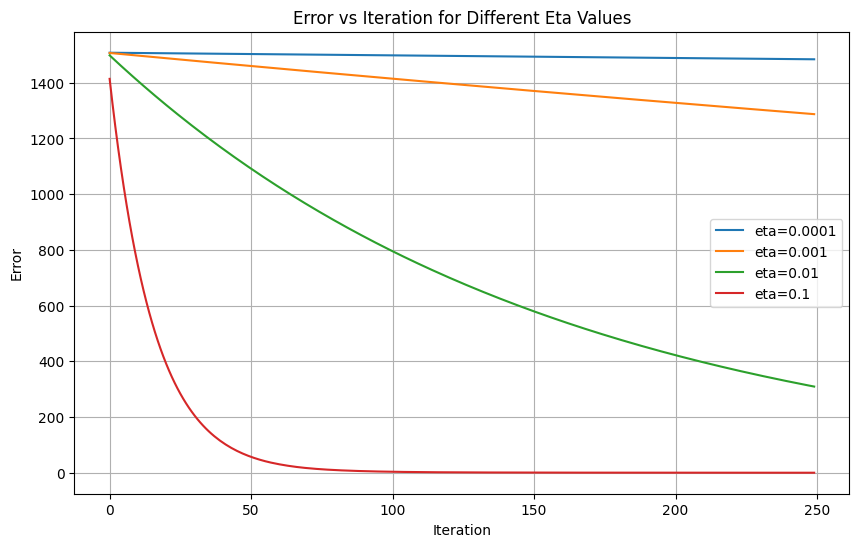

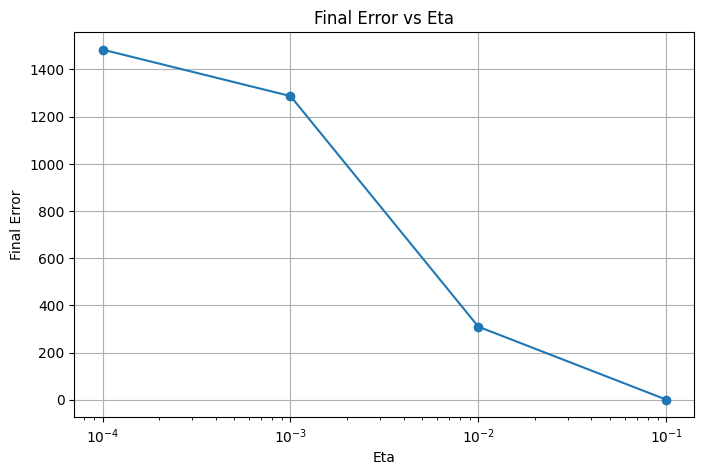

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensions: M is DxT, N is DxK, W is KxT
D = 100  # Example dimension for Fourier size
T = 200  # Number of spectral vectors
K = 50   # Number of notes

# Generate random matrices for N and M (to simulate the actual spectrogram and notes matrix)
np.random.seed(42)
M = np.abs(np.random.randn(D, T))  # M is the magnitude spectrogram, it must be non-negative
N = np.abs(np.random.randn(D, K))  # N is the matrix of notes, also non-negative

# Gradient descent parameters
eta_values = [0.0001, 0.001, 0.01, 0.1]
num_iterations = 250

# Function to compute error
def compute_error(M, N, W):
    return np.linalg.norm(M - np.dot(N, W), 'fro')**2 / (D * T)

# Gradient Descent with Non-Negative Projection
def gradient_descent_non_negative(M, N, eta, num_iterations):
    D, T = M.shape
    K = N.shape[1]
    W = np.ones((K, T))  # Initialize W to all ones

    error_list = []  # To store error at each iteration

    for i in range(num_iterations):
        # Compute the gradient
        gradient = -2 * np.dot(N.T, (M - np.dot(N, W))) / (D * T)

        # Update W
        W_new = W - eta * gradient

        # Project onto the non-negative space (set negative values to 0)
        W_new = np.maximum(W_new, 0)

        # Update W
        W = W_new

        # Compute and store the error
        error = compute_error(M, N, W)
        error_list.append(error)

    return W, error_list

# Plotting the results
plt.figure(figsize=(10, 6))
for eta in eta_values:
    W_final, error_list = gradient_descent_non_negative(M, N, eta, num_iterations)
    plt.plot(range(num_iterations), error_list, label=f'eta={eta}')

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration for Different Eta Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot final error vs eta
final_errors = []
for eta in eta_values:
    W_final, error_list = gradient_descent_non_negative(M, N, eta, num_iterations)
    final_errors.append(error_list[-1])

plt.figure(figsize=(8, 5))
plt.plot(eta_values, final_errors, marker='o')
plt.xscale('log')
plt.xlabel('Eta')
plt.ylabel('Final Error')
plt.title('Final Error vs Eta')
plt.grid(True)
plt.show()


In [ ]:
""" Load Notes and Music """
# You may reuse your 'load_data' function from prob 2


## 3c : Recreating music

In [105]:
""" Solution to Problem 3-c here: Synthesize Music (no points here) """
# You may reuse the 'synthesize_music' function from prob 2.
# write the synthesized music as 'polyushka_syn_3c.wav' to the 'results' folder.

import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Assuming M, N, and W are defined from the previous steps
# Dimensions: M is DxT, N is DxK, W is KxT
D = 100  # Example dimension for Fourier size
T = 200  # Number of spectral vectors
K = 50   # Number of notes

# Generate random matrices for N and M (to simulate the actual spectrogram and notes matrix)
np.random.seed(42)
M = np.abs(np.random.randn(D, T))  # M is the magnitude spectrogram, it must be non-negative
N = np.abs(np.random.randn(D, K))  # N is the matrix of notes, also non-negative

# Step 1: Reconstruct the magnitude spectrogram using the optimized W
def reconstruct_spectrogram(N, W):
    return np.dot(N, W)

# Step 2: Recreate the time-domain signal from the reconstructed spectrogram
def reconstruct_audio(magnitude_spectrogram, sr=22050, n_fft=2048, hop_length=512):
    # Generate a random phase (since we don't have phase information)
    phase = np.exp(1j * np.random.rand(*magnitude_spectrogram.shape) * 2 * np.pi)

    # Combine magnitude with random phase to get the complex spectrogram
    complex_spectrogram = magnitude_spectrogram * phase

    # Use inverse Short-Time Fourier Transform (iSTFT) to get back to the time domain
    audio = librosa.istft(complex_spectrogram, hop_length=hop_length)
    return audio

# Step 3: Save the resynthesized audio as a .wav file
def save_audio(filename, audio, sr=22050):
    audio = np.int16((audio / np.max(np.abs(audio))) * 32767)  # Normalize audio to 16-bit PCM
    write(filename, sr, audio)

# Assuming W_best is the final optimized W from gradient descent in 3b
W_best = W_final  # From 3b's result

# Step 1: Recreate the magnitude spectrogram
reconstructed_spectrogram = reconstruct_spectrogram(N, W_best)

# Step 2: Resynthesize the audio
audio = reconstruct_audio(reconstructed_spectrogram)

# Step 3: Save the audio file
save_audio('reconstructed_music.wav', audio)

# Optional: Play the audio (if you are using a Jupyter notebook)
import IPython.display as ipd
ipd.Audio(audio, rate=22050)

# **Problem 4: Regularization based on linear regression**

## 4a

# I was trying to compile the LaTeX code in Colab, but I encountered some issues with the alignment, which wasn't coming out perfectly. As a result, I have attached a PDF file with the correct formatting in the assignment folder. Please refer to it.
#Thank you for your understanding!

Just adding LaTex codr for reference.

\documentclass{article}
\usepackage{amsmath}
\usepackage{amsfonts}

\begin{document}

\section*{Problem 4: Regularization based on linear regression}

Suppose we have an input vector \(X^T = (X_1, X_2, \dots, X_p)\) and want to predict a real-valued output \(Y\). The linear regression model is given by:

\[
f(X) = \beta_0 + \sum_{j=1}^{p} X_j \beta_j
\]

The most popular estimation method to estimate the parameter \(\beta\) is least squares, in which we pick the coefficients \(\beta = (\beta_0, \beta_1, \dots, \beta_p)^T\) to minimize the residual sum of squares:

\[
RSS(\beta) = \sum_{i=1}^{N} \left( y_i - f(x_i) \right)^2 = \sum_{i=1}^{N} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2
\]

\section*{Part (a): Writing the residual sum of squares in matrix form}

We can represent the input data \(X\) as an \(N \times (p+1)\) matrix:

\[
X = \begin{pmatrix}
1 & x_{11} & x_{12} & \dots & x_{1p} \\
1 & x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{N1} & x_{N2} & \dots & x_{Np}
\end{pmatrix}
\]

Let \(\beta\) be the \((p+1)\)-dimensional vector of coefficients:

\[
\beta = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{pmatrix}
\]

And \(y\) be the \(N\)-dimensional vector of outputs:

\[
y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{pmatrix}
\]

The residual sum of squares can then be written in matrix form as:

\[
RSS(\beta) = (y - X\beta)^T (y - X\beta)
\]

\section*{Part (b): Introducing \(L_2\) Regularization}

We now introduce \(L_2\) regularization. The penalized residual sum of squares is given by:

\[
RSS_{\text{penalized}}(\beta) = \sum_{i=1}^{N} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
\]

In matrix form, this can be written as:

\[
RSS_{\text{penalized}}(\beta) = (y - X\beta)^T (y - X\beta) + \lambda \beta^T \beta
\]

To find the optimal \(\beta\), we take the derivative of \(RSS_{\text{penalized}}(\beta)\) with respect to \(\beta\) and set it to zero:

\[
\frac{\partial}{\partial \beta} \left[ (y - X\beta)^T (y - X\beta) + \lambda \beta^T \beta \right] = -2X^T (y - X\beta) + 2\lambda \beta = 0
\]

Simplifying:

\[
X^T X \beta + \lambda \beta = X^T y
\]

\[
(X^T X + \lambda I) \beta = X^T y
\]

Where \(I\) is the identity matrix. This is the solution for \(\beta\) with \(L_2\) regularization, known as ridge regression.

\section*{Part (c): Behavior as \(\lambda \to 0\)}

As \(\lambda \to 0\), the regularization term \(\lambda \beta^T \beta\) vanishes, and we return to the ordinary residual sum of squares:

\[
RSS_{\text{penalized}}(\beta) \to (y - X\beta)^T (y - X\beta)
\]

Thus, the solution for \(\beta\) approaches the ordinary least squares (OLS) solution:

\[
\beta = (X^T X)^{-1} X^T y
\]

This is the solution without regularization.

\end{document}
< YOUR ANSWER HERE >

# **Submission**

**You are ready to submit in Canvas!**

4 easy steps to submit your lab:

1.   Go to "File" - Download ".ipynb" and ".py"
2.   Click on "Share" option on top right - Click on "copy link" option. Make sure your permission is set to "Anyone on the internet with this link can view"
3.   Upload both the ".ipynb" and ".py" file obtained from Step (1) with your 'results' folder to Canvas. If it is too big, zip it before uploading.
4.   At the beginning of notebook cell (Colab), paste the link obtained from Step (3).

That's it!

In short, we want to have one link, one .ipynb, one .py and one 'HW1_yourJHID.zip' containing all the required outputs.

Please suffix your colab file and the zip file with your _jhID, eg: HW1_myjhID12
